

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import os
os.makedirs("/content/my_directory", exist_ok=True)  # Creates directory inside Colab's file system


In [ ]:
!mkdir -p /content/data


In [ ]:
!ls -l /content


total 12
drwxr-xr-x 2 root root 4096 Mar 30 15:53 data
drwxr-xr-x 2 root root 4096 Mar 30 15:52 my_directory
drwxr-xr-x 1 root root 4096 Mar 24 13:34 sample_data


In [ ]:
df.to_csv("data/BA_reviews.csv")
!ls -l /content

total 12
drwxr-xr-x 2 root root 4096 Mar 30 15:54 data
drwxr-xr-x 2 root root 4096 Mar 30 15:52 my_directory
drwxr-xr-x 1 root root 4096 Mar 24 13:34 sample_data


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
!ls -l /content

total 12
drwxr-xr-x 2 root root 4096 Mar 30 15:54 data
drwxr-xr-x 2 root root 4096 Mar 30 15:52 my_directory
drwxr-xr-x 1 root root 4096 Mar 24 13:34 sample_data


In [ ]:
import pandas as pd
df = pd.read_csv("data/BA_reviews.csv")
print(df.head())  # Show first few rows


   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |   Flight mainly let down by ...
1           1  ✅ Trip Verified |   Another awful experience b...
2           2  ✅ Trip Verified |   The service was rude, full...
3           3  ✅ Trip Verified |   This flight was a joke. Th...
4           4  ✅ Trip Verified |   This time British Airways ...


In [ ]:
from google.colab import files
files.download("data/BA_reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## step 2 data cleaning


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data/BA_reviews.csv")

# Display first few rows
df.head()


,Unnamed: 0,reviews
0,0,✅ Trip Verified | Flight mainly let down by ...
1,1,✅ Trip Verified | Another awful experience b...
2,2,"✅ Trip Verified | The service was rude, full..."
3,3,✅ Trip Verified | This flight was a joke. Th...
4,4,✅ Trip Verified | This time British Airways ...


In [ ]:
df.isnull().sum()  # Check for null values


,0
Unnamed: 0,0
reviews,0


In [ ]:
df.columns
df.drop(columns=["Unnamed: 0"], inplace=True)


In [ ]:
df.duplicated().sum()  # Count duplicate rows
df.drop_duplicates(inplace=True)  # Remove duplicate rows


In [ ]:
print(df.columns)


Index(['reviews'], dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Remove extra spaces
df.rename(columns={"reviews": "review_text"}, inplace=True)  # Rename column


In [ ]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and remove extra spaces
    return text

df["cleaned_review"] = df["review_text"].astype(str).apply(clean_text)



In [ ]:
print(df.columns)


Index(['review_text', 'cleaned_review'], dtype='object')


In [ ]:
df.to_csv("data/cleaned_BA_reviews.csv", index=False)


In [ ]:
df.head()  # Shows the first 5 rows


,review_text,cleaned_review
0,✅ Trip Verified | Flight mainly let down by ...,trip verified flight mainly let down by a d...
1,✅ Trip Verified | Another awful experience b...,trip verified another awful experience by b...
2,"✅ Trip Verified | The service was rude, full...",trip verified the service was rude full of ...
3,✅ Trip Verified | This flight was a joke. Th...,trip verified this flight was a joke there ...
4,✅ Trip Verified | This time British Airways ...,trip verified this time british airways man...


##step 3 analyses of the data

In [ ]:
!pip install textblob
from textblob import TextBlob


In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["cleaned_review"].apply(get_sentiment)


<ipython-input-37-49e2e43d1071>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"], palette="coolwarm")


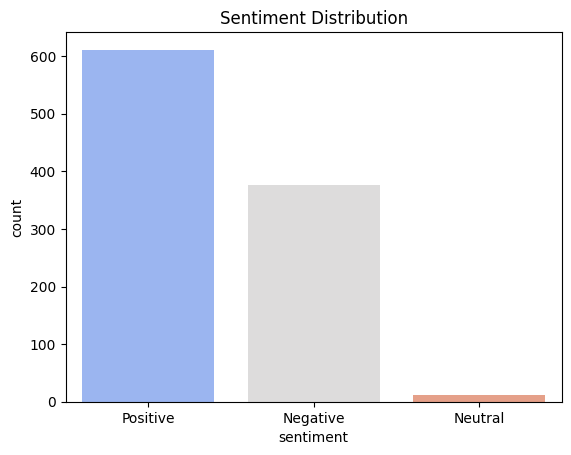

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()


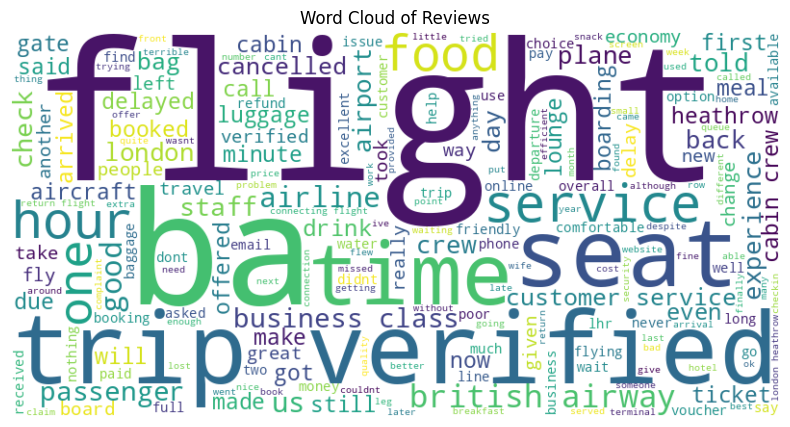

In [ ]:
from wordcloud import WordCloud

text = " ".join(review for review in df["cleaned_review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()


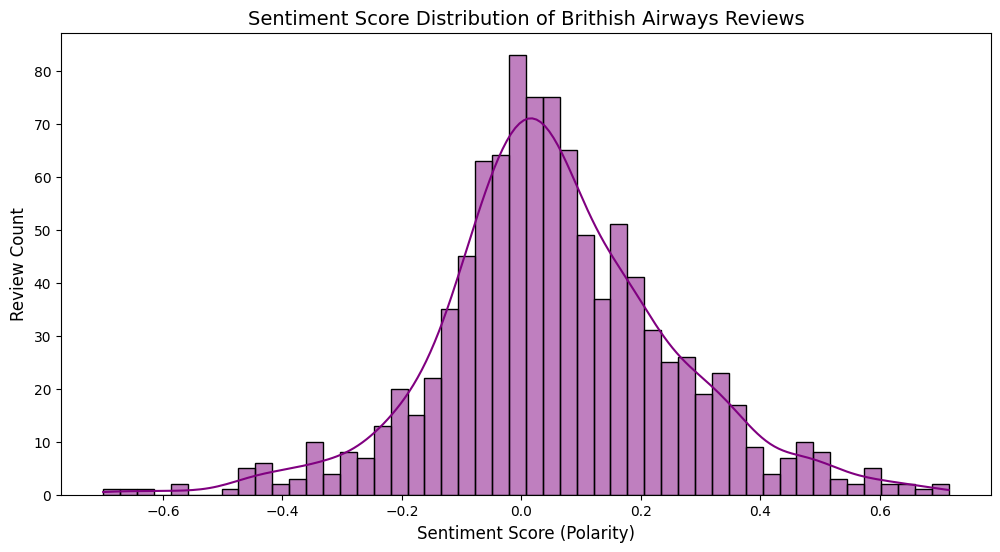

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Increase number of reviews (use full dataset)
df["sentiment_score"] = df["cleaned_review"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df["sentiment_score"], bins=50, kde=True, color="purple")
plt.title("Sentiment Score Distribution of Brithish Airways Reviews", fontsize=14)
plt.xlabel("Sentiment Score (Polarity)", fontsize=12)
plt.ylabel("Review Count", fontsize=12)
plt.show()


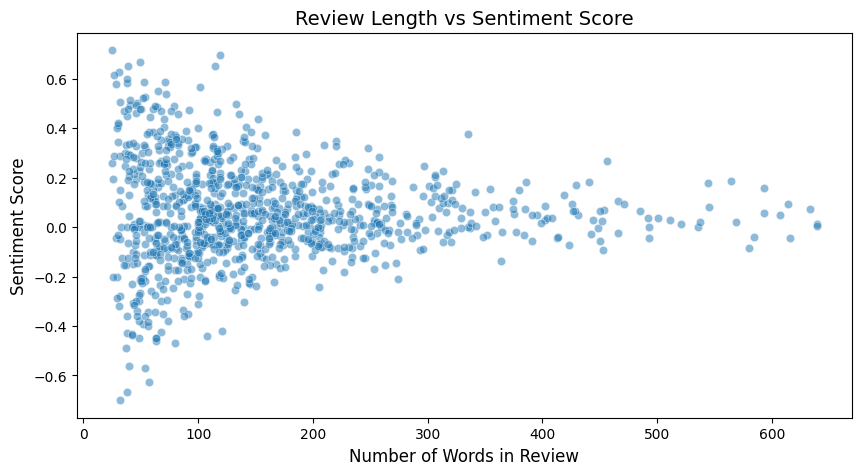

In [ ]:
df["review_length"] = df["cleaned_review"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["review_length"], y=df["sentiment_score"], alpha=0.5)
plt.title("Review Length vs Sentiment Score", fontsize=14)
plt.xlabel("Number of Words in Review", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.show()


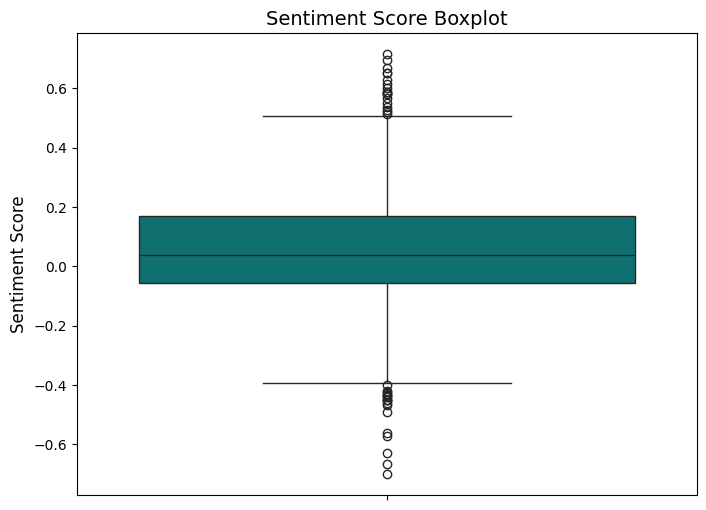

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["sentiment_score"], color="teal")
plt.title("Sentiment Score Boxplot", fontsize=14)
plt.ylabel("Sentiment Score", fontsize=12)
plt.show()


KeyError: 'date'